In [96]:
import seaborn as sns
import pandas as pd
import numpy as np
import os
from keras import models, layers, optimizers
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline
sns.set_style('dark')


In [97]:
df = pd.read_csv('input/train.csv')
dft = pd.read_csv('input/test.csv')


In [98]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [99]:
dft.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Now, to preprocess our data, we will perform the following operations:

- Fill all the empty cells will 0 or col.mean() (Here we have chosen 0)
- Convert the string to integers such that male = 0 and female = 1
- As the 'PassengerId' column is not useful for training, we will discard that column
- Discard all the useless columns that does not contain arithmetic data and keep the rest
- Store the reduced dataframe into new dataframe and finally visualize the data

In [100]:
df = df.fillna(0)
dft = dft.fillna(0)

df = df.replace(['male', 'female'], [0, 1])
dft = dft.replace(['male', 'female'], [0, 1])

df = df.drop(columns=['PassengerId'])

out_targets = dft['PassengerId'].values

cols = [i for i in df.describe()]
colt = [i for i in dft.describe()]

df_reduced = df[cols]
dft_red = dft[colt[1:]]

display(df_reduced.head())
dft_red.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,34.5,0,0,7.8292
1,3,1,47.0,1,0,7.0000
2,2,0,62.0,0,0,9.6875
3,3,0,27.0,0,0,8.6625
4,3,1,22.0,1,1,12.2875


In [101]:
train_labels = df_reduced['Survived'].values
df_reduced = df_reduced.drop(columns=['Survived'])
train_data = df_reduced.values
test_data = dft_red.values
display(train_data.shape, train_labels.shape, test_data.shape)


(891, 6)

(891,)

(418, 6)

In [102]:
display(train_labels, df_reduced, train_data, test_data)


array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,3,1,0.0,1,2,23.4500
889,1,0,26.0,0,0,30.0000


array([[ 3.    ,  0.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 3.    ,  1.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 3.    ,  1.    ,  0.    ,  1.    ,  2.    , 23.45  ],
       [ 1.    ,  0.    , 26.    ,  0.    ,  0.    , 30.    ],
       [ 3.    ,  0.    , 32.    ,  0.    ,  0.    ,  7.75  ]])

array([[ 3.    ,  0.    , 34.5   ,  0.    ,  0.    ,  7.8292],
       [ 3.    ,  1.    , 47.    ,  1.    ,  0.    ,  7.    ],
       [ 2.    ,  0.    , 62.    ,  0.    ,  0.    ,  9.6875],
       ...,
       [ 3.    ,  0.    , 38.5   ,  0.    ,  0.    ,  7.25  ],
       [ 3.    ,  0.    ,  0.    ,  0.    ,  0.    ,  8.05  ],
       [ 3.    ,  0.    ,  0.    ,  1.    ,  1.    , 22.3583]])

Now we will normalize the cleaned dataset using Z-Normalization technique

In [103]:
# For train data
mean = train_data.mean(axis=0)  # 0 means along column
std = train_data.std(axis=0)
train_data -= mean
train_data /= std

# For test data
meant = test_data.mean(axis=0)
stdt = test_data.std(axis=0)
test_data -= mean
test_data /= std


Now, we will create the model

In [104]:
x_train, x_test, y_train, y_test = train_test_split(
    train_data, train_labels, test_size=0.20, shuffle=True)


In [105]:
display(x_train, x_test, y_train, y_test)
display(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


array([[-0.36936484,  1.35557354, -0.95525445, -0.4745452 ,  2.00893337,
        -0.11988611],
       [ 0.82737724, -0.73769513, -0.10231279, -0.4745452 , -0.47367361,
        -0.48944219],
       [-0.36936484, -0.73769513, -1.35329389, -0.4745452 , -0.47367361,
        -0.64842165],
       ...,
       [-1.56610693, -0.73769513,  1.31925664, -0.4745452 , -0.47367361,
         0.1267638 ],
       [-0.36936484, -0.73769513,  1.60357052, -0.4745452 , -0.47367361,
        -0.37660338],
       [ 0.82737724, -0.73769513, -0.27290112, -0.4745452 , -0.47367361,
        -0.48633742]])

array([[-1.56610693, -0.73769513, -1.35329389, -0.4745452 , -0.47367361,
         0.35831271],
       [-1.56610693, -0.73769513,  1.03494275,  0.43279337, -0.47367361,
         0.39858208],
       [-0.36936484, -0.73769513, -1.18270556,  0.43279337,  0.76762988,
        -0.27089627],
       ...,
       [-0.36936484, -0.73769513, -1.35329389, -0.4745452 , -0.47367361,
        -0.64842165],
       [-1.56610693,  1.35557354,  0.86435442,  0.43279337,  0.76762988,
         1.0259447 ],
       [ 0.82737724,  1.35557354, -1.31064681,  1.34013193,  0.76762988,
        -0.26066181]])

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,

array([0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

(712, 6)

(179, 6)

(712,)

(179,)

In [106]:
index = 200
x_val = x_train[:index]
y_val = y_train[:index]
partial_x_train = x_train[index:]
partial_y_train = y_train[index:]


The network architecture
The model contains two fully connected hidden layers each containing 16 units.

- model.add(layers.Dense(10, activation='relu', input_shape=(6,)))
- model.add(layers.Dense(10, activation='relu'))
- model.add(layers.Dense(1, activation='sigmoid'))

for the first two layers, we have used the ReLU (Rectified Linear Unit) and for the last output layer, we will be using the Sigmoid activation.
As we are working on a smaller dataset with somewhat larger network, our model could overfit and its accuracy could be affected. In order to overcome this, we will introduce a regulaization technique called as Dropout.

In [107]:
model = models.Sequential()
model.add(layers.Dense(10, activation='relu', input_shape=(6,)))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dropout(0.6))

model.add(layers.Dense(1, activation='sigmoid'))


In [108]:
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6,
                     momentum=0.9)  # Optimizer func

model.compile(optimizer=sgd, loss='binary_crossentropy',
              metrics=['accuracy'])  # Loss func


In [109]:
history = model.fit(partial_x_train, partial_y_train, epochs=500,
                    batch_size=32, validation_data=(x_val, y_val), verbose=0)


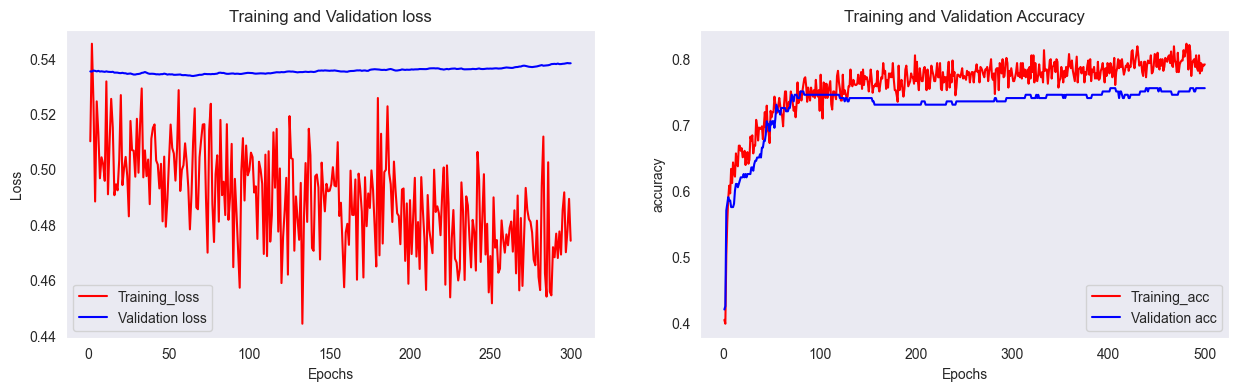

In [110]:
hist = history.history
acc = hist['accuracy']
a = 200
b = len(acc)
val_loss = hist['val_loss'][a:b]
loss = hist['loss'][a:b]
val_acc = hist['val_accuracy']
epc = range(1, (b-a)+1)

plt.figure(figsize=(15, 4))
plt.clf()
plt.subplot(1, 2, 1)

plt.plot(epc, loss, 'r', label='Training_loss')
plt.plot(epc, val_loss, 'b', label='Validation loss')

plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

epc = range(1, len(acc)+1)
plt.subplot(1, 2, 2)

plt.plot(epc, acc, 'r', label='Training_acc')
plt.plot(epc, val_acc, 'b', label='Validation acc')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()


In [111]:
model = models.Sequential()
model.add(layers.Dense(10, activation='relu', input_shape=(6,)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(1, activation='sigmoid'))

sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9)

model.compile(optimizer=sgd,
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(train_data, train_labels,
          epochs=500,
          batch_size=32,
          verbose=0)


In [112]:
results = model.evaluate(x_test, y_test)
display(results)


6/6 [==============================] - 0s 1ms/step - loss: 0.3859 - accuracy: 0.8268


[0.3858795166015625, 0.826815664768219]

In [113]:
predictions = model.predict(test_data)
# predictions
pred = [1 if predictions[i] > 0.25 else 0 for i in range(len(test_data))]


14/14 [==============================] - 0s 687us/step


In [114]:
display(pred)


[0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,


In [115]:
res = pd.DataFrame()
display(pd.read_csv('input/gender_submission.csv').head())

res['PassengerId'] = out_targets
res['Survived'] = pred
display(res.head())


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [116]:
res.to_csv('Submission.csv', index=False)
